In [2]:
# Assignment 2
# Abhay Charan Patro
# BTECH/10021/18
# CSE B

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)

In [4]:
#Reading the csv file
data=pd.read_csv('Salary_Data.csv')

In [5]:
# Describing the data
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
# Showing the top contents of the data
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [7]:
# Checking for empty data fields
flag=data.isnull().values.any()
if(flag):
  print("The data set contains empty field")
else:
  print("The data set does'nt contain any empty field")

The data set does'nt contain any empty field


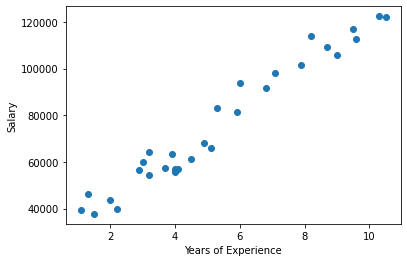

In [8]:
# Plotting the data
plt.scatter(data['YearsExperience'],data['Salary'])
plt.ylabel("Salary")
plt.xlabel("Years of Experience")

plt.show()

In [9]:
#Converting the data frame into 2 numpy arrays
experience=np.array(data['YearsExperience'])
salary=np.array(data['Salary'])

In [10]:
# Linear Regression using method 1 (Ordinary Least Squares)
# Given a data set to find a line equation of the form y=mx+b which fits the data as good as possible
def ordinaryleastsquares(X,y):
  Xmean=np.sum(X)/X.size
  ymean=np.sum(y)/y.size
  a=X-Xmean
  b=y-ymean
  numerator=np.dot(a,b)
  denominator=np.dot(a,a)
  m=numerator/denominator
  b=ymean-m*Xmean
  ypredictions=m*X+b
  return ypredictions

25792.200198668696
9449.962321455076


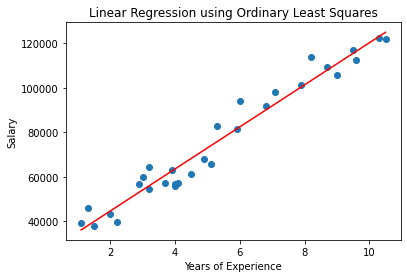

In [19]:
# Predicting y values using method 1 and plotting the regresison line
ypredictions=ordinaryleastsquares(experience,salary)
plt.plot(experience,ypredictions,color="red")
plt.scatter(experience,salary)
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Linear Regression using Ordinary Least Squares")
plt.show()

In [12]:
# Defining the R-Squared Metric
def RSquared(y,ypredictions):
  RSS=y-ypredictions
  RSS=np.dot(RSS,RSS)
  ymean=np.sum(y)/y.size
  TSS=y-ymean
  TSS=np.dot(TSS,TSS)
  Rsq=1-(RSS/TSS)
  return Rsq

In [13]:
# Finding the Rsquared metric for our model 
print("The R-squared value is ",RSquared(salary,ypredictions))

The R-squared value is  0.9569566641435086


In [14]:
# Cost function
def computecost(X,y,params):
  H=np.matmul(X,params)
  H=H-y
  H=np.matmul(np.transpose(H),H)
  J=H/X.shape[0]
  return J

In [15]:
# Linear Regression using Method 2 (Gradient Descent)
def Gradientdescent(alpha,iteration,X,y):
  # To return parameters m and b
  prev_error=0
  size=X.size
  params=np.array([[0],[0]])
  X=X.reshape(size,1)
  y=y.reshape(size,1)
  a=np.ones(size)
  a=a.reshape(size,1)
  X=np.concatenate((a,X),axis=1)
  Jhist=computecost(X,y,params)
  for i in range(0,iteration):
    gama=np.matmul(X,params) 
    gama=gama-y  
    gama=(2/size)*(np.matmul(np.transpose(gama),X))
    params=params-alpha*np.transpose(gama)
    Jnew=computecost(X,y,params)
    if( Jnew[0][0]>Jhist[0][0]):
      print("Overshooting ....... decrease alpha")
      return 0
    Jhist=Jnew
  return params






In [16]:
params=Gradientdescent(0.001,10000,experience,salary)

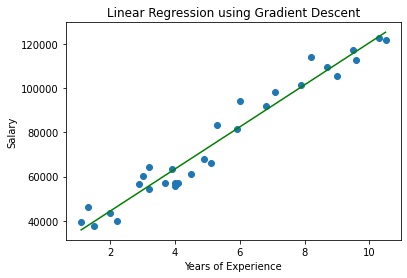

In [17]:
# Plotting the results
b=params[0][0]
m=params[1][0]
ypredictions_graddesecnt=m*experience+b
plt.scatter(experience,salary)
plt.plot(experience,ypredictions_graddesecnt,color="green")
plt.ylabel("Salary")
plt.xlabel("Years of Experience")
plt.title("Linear Regression using Gradient Descent")
plt.show()

In [18]:
# Finding the Rsquared metric for our second model 
print("The R-squared value is ",RSquared(salary,ypredictions_graddesecnt))

The R-squared value is  0.9569208739474417
